# DSCI 100 Group Project Report

### Introduction

Tennis is a sport in which players use stringed rackets to hit a felt-coated rubber ball over a net and into the opponent’s court. This sport is played in two formats: singles, between two individuals, and doubles, between two teams of two players each. The competition and uncertainty in a match of tennis make it the perfect sport for many people. In recent years, with the growth of the world economy and the worldwide sports industry, coupled with its growth in health consciousness, slow-paced work-life balance, and inclusive culture, tennis has become one of the most sought-after sports and one of the most popular sports tournaments worldwide (Musa, 2023). The attractive sport of tennis has intrigued many spectators, game hosts, and even investors. The rise of online betting has led to a dedicated market centered around in-match win probability (Gollub, 2017). Given the sport’s ever-growing popularity and promising requirement of prediction, we are interested in understanding the relationship between a player's stats and the likelihood of winning a game. By gaining insights into how these factors relate to the probability of winning, we can make better informed predictive decisions regarding future tennis matches.

##### UNNECESSARY?

In recent years, there has been a growing demand for predicting tennis game win probabilities. As early as 2017, ESPN utilized its own tennis win rate prediction model to display the win probabilities for each player or team within a score box during televised Major League Baseball games (Steinberg, 2017). The probability of winning from a given scoreline indicates the likelihood of success for a team or player. Although various models can generate it, those in the field of sports analytics aim to create the most accurate estimate. Several previous studies have indicated that factors influence tennis match results, such as court surface, weather conditions, and the mental and physical state of players. With a significant number of variables at play, predicting tennis outcomes becomes challenging, making it one of the harder sports to forecast (Tennis up to date, n.d.).

We have identified several factors that we believe influence the win rate of a player, including their age, number of aces, and number of first serves in. Naturally, younger players often enjoy certain athletic advantages, so it's reasonable to expect that age could serve as a predictor variable when it comes to win rate. However, conventional wisdom can sometimes lead us astray, as factors that may seem significant on the surface might not prove to be strong predictors. For instance, it's possible that a higher number of aces may not actually significantly impact the match's outcome. These findings could prompt further exploration into the significance of these statistics in relation to the win rate. Analyzing data from recent years, or even from earlier periods, may reveal substantial differences and shed light on how the sport of tennis has evolved. By exploring the sport through the statistics of top level players, can we predict the win rate of a player given their various statistics?

To conduct our research, we chose to use the `atp2017-2019.csv` data set provided on the group project proposal page on Canvas. This data set was pulled from a larger project done by Jeff Sackmann (2023) on GitHub. It contains 6866 observations and 49 variables. Each observation represents a match played in 2017–2019 between the top 500 ATP-ranked players. The variables contain information both about the match and the individual player stats, with 11 being unique variables and the rest being various player stats that are separate for the winner and the loser.

The individual player stats are the values we are most interested in. Ignoring the difference in naming between the columns for the winners and losers, the variables include the following:

* `age` : age at the time of the match
* `ace` : number of aces (legal serves that are not touched by the receiver)
* `df` : number of double faults (two mistakes made by the serving player, resulting in the loss of the point)
* `svpt` : total serve points won
* `1stIn` : number of first serves in
* `1stWon` : number of points won on first serve
* `2ndWon` : number of points won on second serve
* `SvGms` : number of service games (player is the one serving)
* `bpSaved` : break points saved (serving player prevents the receiver from winning the point and stealing their service game)
* `bpFaced` : break points faced (if the receiver wins the next point, they win the serving player's game)

`minutes` is also a column of interest, as the average length of matches played will vary between players. These variables will be explored, and potentiallly included in the prediction model.

### Methods & Results

The following libraries are loaded to provide the functions that are used to operate on the data:

In [2]:
install.packages('GGally')

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggplot2’, ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

The data is read using `read_csv`, and the first few rows are displayed below using `head()`.

In [4]:
tennis_data <- read_csv("atp2017-2019.csv") |>
    select(-...1) |>
    mutate(surface = as_factor(surface))
head(tennis_data)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id tourney_name surface draw_size tourney_level tourney_date
1 2019-M020  Brisbane     Hard    32        A             20181231    
2 2019-M020  Brisbane     Hard    32        A             20181231    
3 2019-M020  Brisbane     Hard    32        A             20181231    
4 2019-M020  Brisbane     Hard    32        A             20181231    
5 2019-M020  Brisbane     Hard    32        A             20181231    
6 2019-M020  Brisbane     Hard    32        A             20181231    
  match_num winner_id winner_seed winner_entry ⋯ l_1stIn l_1stWon l_2ndWon
1 300       105453    2           NA           ⋯ 54      34       20      
2 299       106421    4           NA           ⋯ 52      36        7      
3 298       105453    2           NA           ⋯ 27      15        6      
4 297       104542    NA          PR           ⋯ 60      38        9      
5 296       106421    4           NA           ⋯ 56      46       19      
6 295       104871    NA          NA           ⋯ 54      40       18      
  l_SvGms l_bpSaved l_bpFaced winner_rank winner_rank_points loser_rank
1 14      10        15          9         3590                16       
2 10      10        13         16         1977               239       
3  8       1         5          9         3590                40       
4 11       4         6        239          200                31       
5 15       2         4         16         1977                18       
6 15       6         9         40         1050               185       
  loser_rank_points
1 1977             
2  200             
3 1050             
4 1298             
5 1855             
6  275

The match specific stats of the winners of each match are selected and renamed, then assigned to an object named *`tennis_winner`*. The number of wins is also obtained using `group_by()` and `summarize()` and assigned to *`tennis_wins`*.

In [23]:
tennis_winner <- tennis_data |>
    select(winner_name, winner_age, minutes:w_bpFaced) |>
    rename("name" = winner_name, "age" = winner_age, "ace" = w_ace, "df" = w_df, "sv_pts" = w_svpt, "first_sv_in" = w_1stIn, "first_sv_won" = w_1stWon,
           "sec_sv_won" = w_2ndWon, "sv_gms" = w_SvGms, "bp_saved" = w_bpSaved, "bp_faced" = w_bpFaced)

tennis_wins <- tennis_winner |>
    group_by(name) |>
    summarize(win_count = n())

tennis_win_names <- tennis_winner |>
    pull(name)

The stats of the losers are also selected and renamed, but are then filtered to only contain those that have won at least a single match. The number of losses is obtained using the same operations.

In [24]:
tennis_loser <- tennis_data |>
    select(loser_name, loser_age, minutes, l_ace:l_bpFaced) |>
    rename("name" = loser_name, "age" = loser_age, "ace" = l_ace, "df" = l_df, "sv_pts" = l_svpt, "first_sv_in" = l_1stIn, "first_sv_won" = l_1stWon,
           "sec_sv_won" = l_2ndWon, "sv_gms" = l_SvGms, "bp_saved" = l_bpSaved, "bp_faced" = l_bpFaced) |>
    filter(name %in% tennis_win_names)

tennis_losses <- tennis_loser |>
    group_by(name) |>
    summarize(loss_count = n())

tennis_loss_names <- tennis_loser |>
    pull(name)

The number of wins and losses are put into a single table here. `filter()` is used here again, this time to filter to only contain those that have lost at least a single 
match. This creates a better representation of players, as those that have only won or only lost matches over two years are likely outliers who haven't played many games.

In [25]:
win_loss <- tennis_wins |>
    filter(name %in% tennis_loss_names) |>
    bind_cols(select(tennis_losses, loss_count))

Finally, all the data gathered above is put together and assigned to tennis_stats. This data frame contains all players with at least a single win and loss, including their average stats, number of games played, and numbers of wins and losses.

In [26]:
tennis_stats <- bind_rows(tennis_winner, tennis_loser) |>
    filter(name %in% tennis_loss_names) |>
    group_by(name) |>
    summarize(across(age:bp_faced, mean, na.rm = TRUE), games_played = n()) |>
    bind_cols(select(win_loss, win_count, loss_count))

To further improve applicability of the predictive model, only players who have played a minimum of five matches are selected. Predicting based on players who have only won one match and lost another would not be realistic. `mutate()` is also used to add a win_rate column, which will serve as the predicted variable for our analysis. This is the final format of the data.

In [27]:
tennis_wanted_stats <- tennis_stats |>
    filter(games_played >= 5) |>
    mutate(win_rate = win_count / games_played)
head(tennis_wanted_stats)

name                        age      minutes   ace      df       sv_pts  
1 Adam Pavlasek               22.94593  97.50000 6.750000 3.250000 82.75000
2 Adrian Mannarino            29.97470 107.40764 4.848101 2.373418 78.07595
3 Adrian Menendez Maceiras    32.46032 109.13333 3.800000 2.133333 78.53333
4 Akira Santillan             20.06069  75.66667 6.166667 2.833333 65.33333
5 Albert Ramos                30.31832 120.15686 3.823529 2.483660 81.73203
6 Alejandro Davidovich Fokina 19.95811  98.00000 2.000000 2.800000 79.40000
  first_sv_in first_sv_won sec_sv_won sv_gms   bp_saved bp_faced games_played
1 51.62500    35.00000     13.62500   12.87500 5.000000 9.000000   8         
2 48.01266    33.35443     15.55696   12.20886 4.025316 6.778481 158         
3 48.53333    32.06667     14.20000   11.60000 4.066667 7.600000  15         
4 35.00000    25.83333     16.33333   10.66667 2.000000 4.000000   6         
5 50.62745    34.56863     16.21569   12.48366 4.477124 7.320261 153         
6 56.00000    34.00000     10.70000   11.50000 4.900000 9.000000  10         
  win_count loss_count win_rate 
1  3         5         0.3750000
2 81        77         0.5126582
3  4        11         0.2666667
4  2         4         0.3333333
5 72        81         0.4705882
6  3         7         0.3000000

Prior to the analysis, the seed is set for a consistent, reproducible split. The data is split into a training set and a testing set.

In [28]:
set.seed(1000)

tennis_split <- initial_split(tennis_wanted_stats, prop = 0.75, strata = win_rate)  
tennis_training <- training(tennis_split) 
tennis_testing <- testing(tennis_split) 

To explore the data, the means of each of the quantitative variables are found. These are the average values for each of the statistics throughout all players in the training set.

In [29]:
tennis_training_stats <- tennis_training |>
    summarize(across(age:win_rate, mean, na.rm = TRUE))
tennis_training_stats

age      minutes  ace      df      sv_pts   first_sv_in first_sv_won
1 27.06885 109.3325 5.930419 3.06488 82.15995 50.9405     35.73       
  sec_sv_won sv_gms   bp_saved bp_faced games_played win_count loss_count
1 15.55947   12.68901 4.346988 7.244687 61.24699     31.12651  30.12048  
  win_rate
1 0.420444

The average double fault value appears to be greater than expected. Double faults would seem to be quite rare, but this shows that on average, each player has three double faults occur every match. Perhaps the double fault statistic could be of importance for the prediction, as a greater number of double faults may have a negative impact on the win rate.

To continue exploration of the data, `ggpairs()` from the GGally package is used to visualize the relationships between the variables in the training set. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


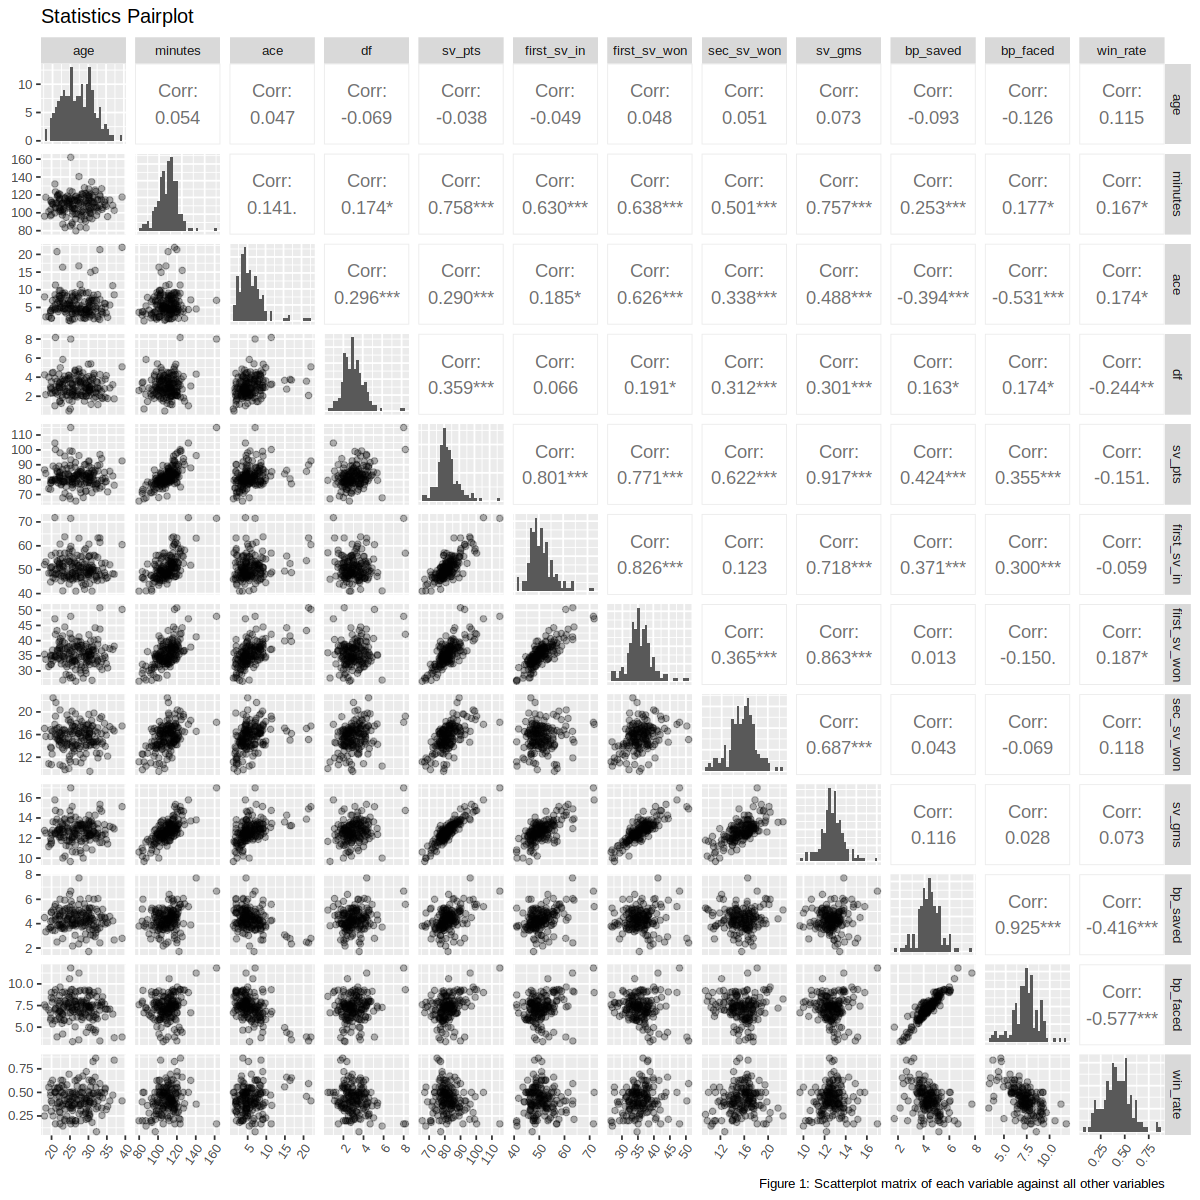

In [30]:
options(repr.plot.width = 10, repr.plot.height = 10)

tennis_pairplot <- tennis_training |> 
    select(-name, -games_played, -win_count, -loss_count) |>
    ggpairs(
        lower = list(continuous = wrap('points', alpha = 0.3)),
        diag = list(continuous = "barDiag")
    ) +
    ggtitle("Statistics Pairplot") +
    labs(caption = "Figure 1: Scatterplot matrix of each variable against all other variables") +
    theme(text = element_text(size = 10)) +
    theme(axis.text.x = element_text(angle = 55, hjust = 1))

tennis_pairplot

Focusing on the final row of plots in _Figure 1_, we can see the relationships between `win_rate` and each of the potential predictors. Supporting the observation made above, the number of double faults does appear to have a negative relationship with the win rate. The number of minutes, break points saved, and break points faced also seem to be somewhat correlated to win rate. We include these predictors in our model below.

In [36]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

#tennis_recipe <- recipe(win_rate ~ age + minutes + ace + df + sv_pts + first_sv_in + first_sv_won + second_sv_won + sv_gms + bp_saved + bp_faced,
#                        data = tennis_training) # YOU CAN CHOOSE VARIABLES HERE, USING ALL RESULTS IN RMPSE = 0.121702318709946

tennis_recipe <- recipe(win_rate ~ age + minutes + df + bp_saved + bp_faced,
                        data = tennis_training) 

tennis_fit <- workflow() |>
    add_model(lm_spec) |>
    add_recipe(tennis_recipe) |>
    fit(data = tennis_training)

tennis_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age      minutes           df     bp_saved     bp_faced  
  5.562e-01   -2.209e-05    3.057e-03   -2.308e-02    1.076e-01   -1.196e-01  


To evaluate how accurately the simple linear regression model is able to predict values, it is tested using the testing set. The root mean square prediction error (RMSPE) is calculated to measure how well it performed.

In [41]:
tennis_preds <- tennis_fit |>
         predict(tennis_testing) |>
         bind_cols(tennis_testing) 

tennis_rmspe <- tennis_preds |>
         metrics(truth = win_rate, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
tennis_rmspe

[1] 0.1216621

The RMSPE received is approximately a value of 0.1217. This means that, on average, the values predicted by the model are 0.1217 off, or 12.17% from the true win rate.

### Discussion

In our exploration of factors influencing tennis game outcomes, we applied a predictive model and assessed its performance using the RMSPE. The computed RMSPE value of approximately 0.1217 indicates an average deviation of 12.17% between the model's predictions and the true win rates.

Understanding the RMSPE is crucial for evaluating the reliability of our predictive model in the context of tennis tournaments. A lower RMSPE generally corresponds to higher predictive accuracy, while a higher value suggests a greater level of prediction error.

The practical implication of our RMSPE result lies in its influence on decision-making in the tennis domain. Stakeholders, including coaches and players, rely on accurate predictions to inform strategic choices. Our model, with a 12.17% average prediction error, prompts further examination of specific instances where deviations occur. This scrutiny opens avenues for refinement and improvement, ensuring our predictions align more closely with actual match outcomes.

### References

Sackmann, J. (2023). _tennis_atp_. GitHub. https://github.com/JeffSackmann/tennis_atp

Gollub, J. (2017). _Producing Win Probabilities for Professional Tennis Matches from any Score_. Bachelor's thesis, Harvard College. https://dash.harvard.edu/bitstream/handle/1/41024787/my_thesis_11_6_final.pdf?sequence=5

Musa, M. (2023). _Tennis Popularity Statistics_. Tennis Racket Ball. https://tennisracketball.com/guide/tennis-popularity-statistics/


Steinberg, D. (2017). _Why ESPN uses those in-game win probability stats that drive some baseball fans nuts_. The Washington Post. https://www.washingtonpost.com/news/dc-sports-bog/wp/2017/04/23/why-espn-uses-those-in-game-win-probability-stats-that-drive-some-baseball-fans-nuts/


["4 Main Factors behind a Tennis Match Outcome." Tennis Up to Date, 26 May 2023](https://tennisuptodate.com/other/4-main-factors-behind-a-tennis-match-outcome)
